In [1]:
import pandas as pd

df = pd.read_parquet('../data/parquet/dataset_size_info.parquet')

datatiers = ['AODSIM', 'MINIAODSIM', 'NANOAODSIM']
df = df[(df['tier'].isin(datatiers))]

df = df.dropna()
df = df[df['dsize'] > 0.]
df = df[df['nfiles'] > 0]
df = df[df['devts'] > 0]


In [2]:
import json

with open('../data/datasets_mcm_info.json') as file:
    mcm_info = json.load(file)

df['campaign'] = df['d_dataset'].apply(
    lambda d: mcm_info[d]['campaign'] if d in mcm_info else 'None')
df = df[df['campaign'] != 'None']
df['year'] = df['campaign'].apply(lambda campaign: '20' + campaign[-2:])
df = df[df['year'] <= '2020']

df.head(None)


,d_dataset,dsize,nfiles,devts,tier,campaign,year
1439,/WprimeToMuNu_M-1200_TuneCUETP8M1_13TeV-pythia...,6.177454e+08,6,20000,MINIAODSIM,RunII-Spring15,2015
1442,/RSGravitonToQuarkQuark_kMpl01_M_6000_TuneCUET...,4.885612e+09,8,99631,MINIAODSIM,RunII-Spring15,2015
1447,/QCD_Pt-30toInf_DoubleEMEnriched_MGG-40to80_Tu...,6.208234e+11,198,2494858,AODSIM,RunII-Spring15,2015
1450,/LQToUE_M-1300_BetaOne_TuneCUETP8M1_13TeV-pyth...,1.639832e+10,14,49816,AODSIM,RunII-Spring15,2015
1454,/ADDmonoPhoton_MD-2_d-8_TuneCUETP8M1_13TeV-pyt...,1.036047e+10,11,50000,AODSIM,RunII-Spring15,2015
...,...,...,...,...,...,...,...
1271109,/HpseudoToTTTo1L1Nu2J_m800_w20p0_int_TuneCP5_1...,5.495919e+08,2,250000,NANOAODSIM,RunII-Summer20,2020
1271117,/ZPrimeToTT_M1200_W360_TuneCP2_13TeV-madgraph-...,3.257134e+10,19,473000,MINIAODSIM,RunII-Summer20,2020
1271118,/HToZATo2L2B_MH-800p00_MA-700p00_tb-20p00_Tune...,1.417517e+10,4,30000,AODSIM,RunII-Summer20,2020
1271119,/ZDfD_ZDtofD1decay_MZD91p1876_MfD15_MfD22_Tune...,1.651916e+07,1,12000,NANOAODSIM,RunII-Summer20,2020


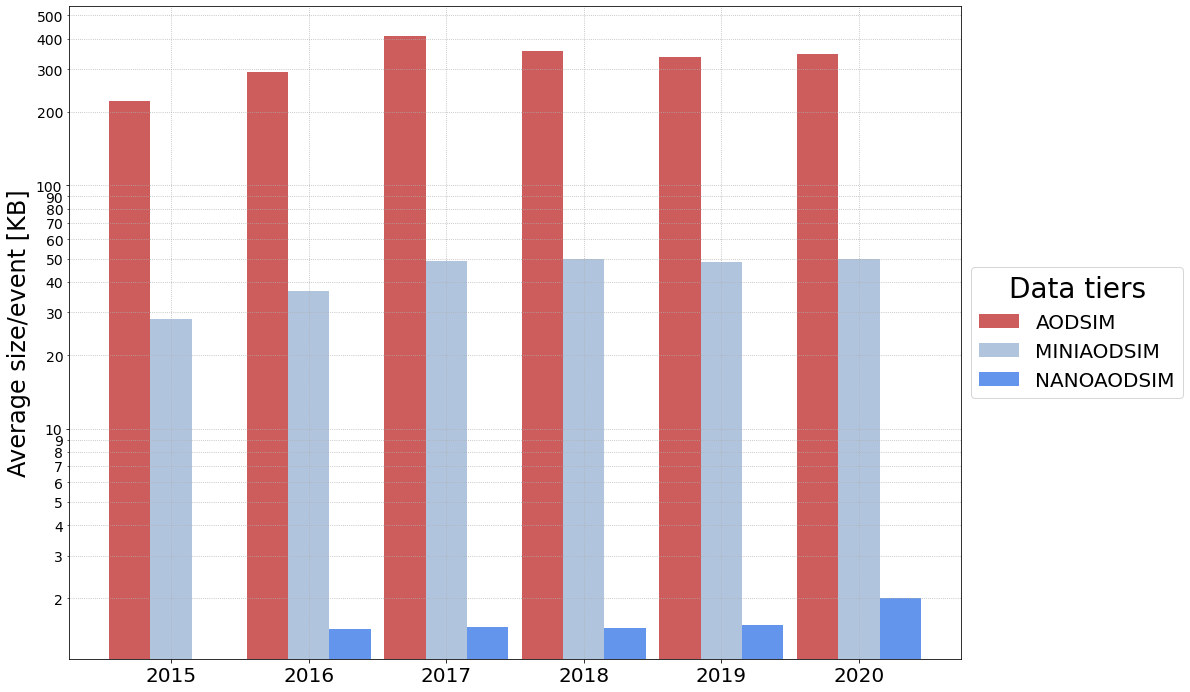

In [3]:
import pylab as plt
from cmSim.tools import plotting

fig, ax = plt.subplots(figsize=(16, 12))
plotting.plot_average_size_per_event(ax, df, datatiers=datatiers)
fig.set_facecolor('white')

plt.show()
